# Iris Flower Classifier

In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

ModuleNotFoundError: No module named 'tensorflow'

## Import and parse the training dataset

In [2]:
import pandas as pd
import numpy as np

iris_train_data = pd.read_csv('http://download.tensorflow.org/data/iris_training.csv', skiprows=[0], names = ['sepal length','sepal width','petal length','petal width','Type'])
iris_train_data['Type'] = np.where(iris_train_data['Type']==0, 'setosa', np.where(iris_train_data['Type']==1, 'versicolor', 'virginica'))

train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)
print("Local copy of the dataset file: {}".format(train_dataset_fp))

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

## Inspect the data

In [29]:
iris_train_data

,sepal length,sepal width,petal length,petal width,Type
0,6.4,2.8,5.6,2.2,virginica
1,5.0,2.3,3.3,1.0,versicolor
2,4.9,2.5,4.5,1.7,virginica
3,4.9,3.1,1.5,0.1,setosa
4,5.7,3.8,1.7,0.3,setosa
5,4.4,3.2,1.3,0.2,setosa
6,5.4,3.4,1.5,0.4,setosa
7,6.9,3.1,5.1,2.3,virginica
8,6.7,3.1,4.4,1.4,versicolor
9,5.1,3.7,1.5,0.4,setosa


## Parse the dataset

In [10]:
def parse_csv(line):
  example_defaults = [[0.], [0.], [0.], [0.], [0]]  # sets field types
  parsed_line = tf.decode_csv(line, example_defaults)
  # First 4 fields are features, combine into single tensor
  features = tf.reshape(parsed_line[:-1], shape=(4,))
  # Last field is the label
  label = tf.reshape(parsed_line[-1], shape=())
  return features, label

## Create the training tf.data.Dataset

In [30]:
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=1000)  # randomize
train_dataset = train_dataset.batch(32)

# View a single example entry from a batch
features, label = tfe.Iterator(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor([5.  3.  1.6 0.2], shape=(4,), dtype=float32)
example label: tf.Tensor(0, shape=(), dtype=int32)


In [31]:
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=1000)  # randomize
train_dataset = train_dataset.batch(32)

# View a single example entry from a batch
features, label = tfe.Iterator(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor([5.2 3.5 1.5 0.2], shape=(4,), dtype=float32)
example label: tf.Tensor(0, shape=(), dtype=int32)


## Select the type of model

In [32]:
# This tutorial uses a neural network to solve the Iris classification problem. 
# We will define a fully-connected neural network
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

## Define the loss and gradient function

In [33]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

def grad(model, inputs, targets):
  with tfe.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, model.variables)

## Create an optimizer

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## Train the model

In [35]:
## Note: Rerunning this cell uses the same model variables

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in tfe.Iterator(train_dataset):
    # Optimize the model
    grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables),
                              global_step=tf.train.get_or_create_global_step())

    # Track progress
    epoch_loss_avg(loss(model, x, y))  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.107, Accuracy: 55.833%
Epoch 050: Loss: 0.487, Accuracy: 81.667%
Epoch 100: Loss: 0.288, Accuracy: 95.833%
Epoch 150: Loss: 0.194, Accuracy: 97.500%
Epoch 200: Loss: 0.142, Accuracy: 97.500%


## Visualize the loss function over time

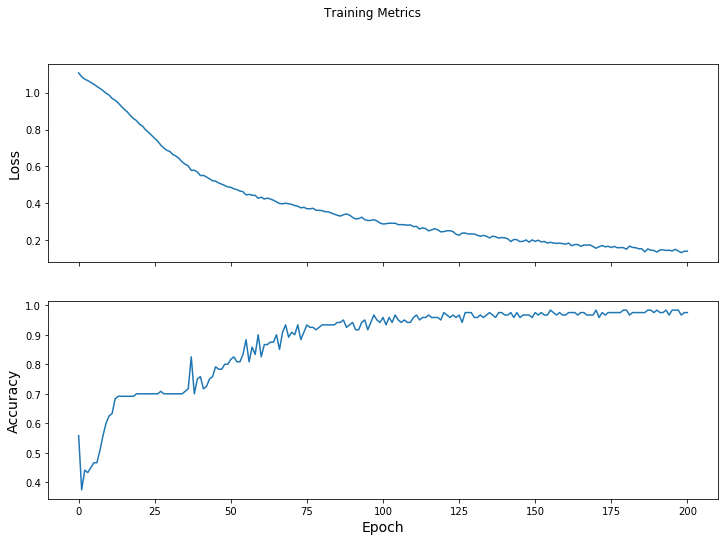

In [36]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

## Evaluate the model's effectiveness

### Setup the test dataset

In [37]:
iris_test_data = pd.read_csv('http://download.tensorflow.org/data/iris_test.csv', skiprows=[0], names = ['sepal length','sepal width','petal length','petal width','Type'])
iris_test_data['Type'] = np.where(iris_test_data['Type']==0, 'setosa', np.where(iris_test_data['Type']==1, 'versicolor', 'virginica'))

test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

In [38]:
iris_test_data

,sepal length,sepal width,petal length,petal width,Type
0,5.9,3.0,4.2,1.5,versicolor
1,6.9,3.1,5.4,2.1,virginica
2,5.1,3.3,1.7,0.5,setosa
3,6.0,3.4,4.5,1.6,versicolor
4,5.5,2.5,4.0,1.3,versicolor
5,6.2,2.9,4.3,1.3,versicolor
6,5.5,4.2,1.4,0.2,setosa
7,6.3,2.8,5.1,1.5,virginica
8,5.6,3.0,4.1,1.3,versicolor
9,6.7,2.5,5.8,1.8,virginica


### Evaluate the model on the test dataset

In [39]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
  prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


### Use the trained model to make predictions

In [40]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([[1.1, 5.3, 13.7, 10.5]])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  name = class_ids[class_idx]
  print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris virginica


# Expose Model 

### show random iris

In [64]:
import random
import numpy as np
import pandas as pd


iris_test_data = pd.read_csv('http://download.tensorflow.org/data/iris_test.csv', skiprows=[0], names = ['sepal length','sepal width','petal length','petal width','Type'])
iris_test_data['Type'] = np.where(iris_test_data['Type']==0, 'setosa', np.where(iris_test_data['Type']==1, 'versicolor', 'virginica'))

def show_random_iris():
    choices = ['setosa','versicolor','virginica']
    random_flower = random.choice(choices)
    flowers = {
        'setosa': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg',
        'versicolor': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg',
        'virginica': 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg'
    }
    random_url = flowers[random_flower]
    single_type = iris_test_data[(iris_test_data['Type']==random_flower)]
    random_row = single_type.sample(n=1).drop(['Type'], axis=1)
    final = random_flower, random_url, random_row
    return(final)

### predict flower

In [19]:
def predict_flower(guess_string):
    guess_list = eval(guess_string)
    predict_dataset = tf.convert_to_tensor([guess_list])
    predictions = model(predict_dataset)
    for i, logits in enumerate(predictions):
        class_idx = tf.argmax(logits).numpy()
        name = class_ids[class_idx]
    return(name)

## Expose via REST API endpoints

In [20]:
import json

In [75]:
# GET /get_random_flower

random_result = show_random_iris()
res = {
    "name" : random_result[0],
    "url" : random_result[1],
    "data" : {"keys" : list(random_result[2]), "values" : random_result[2].iloc[0].tolist()}
}

print(json.dumps(res))

{"name": "setosa", "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg", "data": {"keys": ["A", "B", "C", "D"], "values": [4.3, 3.0, 1.1, 0.1]}}


In [ ]:
# GET /predict_flower

req = json.loads(REQUEST)
args = req['args']

guess_string = args['guess_string'][0] # first argument from URL 

predicted_flower = predict_flower(guess_string)

print(json.dumps(predicted_flower))